**DATA** **GATHERING**

In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [ ]:
# ! mark - It means run it as a shell command rather than a notebook command.
#Python library to download images from Bing.com
!pip install bing-image-downloader

In [ ]:
!mkdir images # Directory for images

In [ ]:
from bing_image_downloader import downloader
#30 images will be downloaded from bing and sent to the images directory we created
# adult_filter_off is beacuse we don't want any unwanted images
downloader.download("sunflower", limit = 30, output_dir = 'images',
                    adult_filter_off = True)

In [ ]:
downloader.download("rugby ball leather", limit = 30, output_dir = 'images',
                    adult_filter_off = True)

In [ ]:
downloader.download("ice cream cone", limit = 30, output_dir = 'images',
                    adult_filter_off = True)

In [53]:
# Preprocessing
# 1. Resizing
# 2. Flattening

# To play around with the folders
import os 
# To display the image
import matplotlib.pyplot as plt
# To do some numerical computing
import numpy as np
# To read the image
from skimage.io import imread
# To resize the image (For the model, we need the images to be of the same size)
from skimage.transform import resize

time: 1.34 ms (started: 2022-12-09 15:46:49 +00:00)


In [54]:
import numpy as np

a = np.array([[1,2,3,4,5],
             [6,7,8,9,45]])
a.ndim

2

time: 6.26 ms (started: 2022-12-09 15:46:49 +00:00)


In [55]:
# How to convert Matrix to Vector? - Flatten
# Flatten : 2D to 1D
a.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 45])

time: 6.38 ms (started: 2022-12-09 15:46:49 +00:00)


In [56]:
# We need the data in two different formats : Input and Output
# We have to flatten the image pixels from 2D to 1D (Matrix to Vector)

target = [] # Output
images = [] # Matrix form
flat_data = [] # Vector form (Input)

DATADIR = '/content/images'
CATEGORIES = ['sunflower','rugby ball leather','ice cream cone']

# Iterate through the categories
for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label Encoding the values
  # Creates the path to use all the images
  path = os.path.join(DATADIR,category) # Joins the 2 paths (DATADIR and category)

  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # print(img_array)
    # plt.imshow(img_array)

    #Resizing the images
    img_resized = resize(img_array,(150,150,3)) # skimage - Normalizes the data from 0 to 1 ( Values 0 to 255 - Value b/w 0 and 1)
    # Storing the resized images in images
    images.append(img_resized)
    # Flattening the images and storing it in flat_data
    flat_data.append(img_resized.flatten())
    target.append(class_num)

# We don't anything to be outside numpy
# If it is in numpy, its easy to iterate and go through it
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 21.4 s (started: 2022-12-09 15:46:49 +00:00)


In [57]:
flat_data[0]

array([0.7212549 , 0.69411765, 0.64150065, ..., 0.74366013, 0.71764706,
       0.6745098 ])

time: 8.05 ms (started: 2022-12-09 15:47:10 +00:00)


In [58]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

time: 9.18 ms (started: 2022-12-09 15:47:10 +00:00)


In [59]:
#unique,count = np.unique(target, return_counts=True)
#plt.bar(CATEGORIES,count)
np.unique(target, return_counts=True)

(array([0, 1, 2]), array([32, 39, 36]))

time: 15.2 ms (started: 2022-12-09 15:47:10 +00:00)


In [60]:
# Split data into Training and Testing

from sklearn.model_selection import train_test_split
# X : flat_data, Y : target
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size = 0.3,random_state = 110)

time: 20.8 ms (started: 2022-12-09 15:47:10 +00:00)


In [61]:
# Using classification algorithm to classify the images
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# For any algorithm in machine learning, you have to learn its specific parameters
# In SVM, you need to get the hyperparameter, to separate b/w the regions(parameters)
# Best parameters

param_grid = [
             {'C':[1,10,100,1000],'kernel':['linear']},
             {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

# To get the probabilities of all three
svc = svm.SVC(probability=True)
"""
GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters.
The model and the parameters are required to be fed in. 
Best parameter values are extracted and then the predictions are made.
It uses a different combination of all the specified hyperparameters and their values, 
and calculates the performance for each combination and selects the best value for the hyperparameters.
"""
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 33.9 s (started: 2022-12-09 15:47:10 +00:00)


In [62]:
# Checking the accuracy
y_pred = clf.predict(x_test)
y_pred

array([0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2,
       1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1])

time: 150 ms (started: 2022-12-09 15:47:44 +00:00)


In [63]:
y_test

array([2, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 2])

time: 6.05 ms (started: 2022-12-09 15:47:45 +00:00)


In [64]:
# To evaluate our model
from sklearn.metrics import accuracy_score,confusion_matrix

time: 426 µs (started: 2022-12-09 15:47:45 +00:00)


In [65]:
accuracy_score(y_pred,y_test)

0.7272727272727273

time: 5.89 ms (started: 2022-12-09 15:47:45 +00:00)


In [66]:
confusion_matrix(y_pred,y_test)

array([[9, 1, 2],
       [0, 8, 1],
       [3, 2, 7]])

time: 13.7 ms (started: 2022-12-09 15:47:45 +00:00)


In [67]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 110 ms (started: 2022-12-09 15:47:45 +00:00)


In [68]:
model = pickle.load(open('img_model.p','rb'))

time: 7.82 ms (started: 2022-12-09 15:47:45 +00:00)


Enter your URLhttps://upload.wikimedia.org/wikipedia/commons/d/da/Strawberry_ice_cream_cone_%285076899310%29.jpg
(1024, 681, 3)
 PREDICTED OUTPUT: ice cream cone


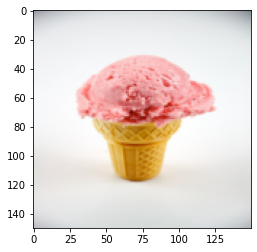

time: 1min 7s (started: 2022-12-09 15:47:45 +00:00)


In [69]:
# Testing a brand new image
flat_data = []
url = input('Enter your URL') #Enter URL of the image (Use jpg image)
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)

y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print (f' PREDICTED OUTPUT: {y_out}')